In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [3]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))



Epoch 1/10
782/782 [==============================] - 53s 66ms/step - loss: 1.6060 - accuracy: 0.4135 - val_loss: 1.3134 - val_accuracy: 0.5247
Epoch 2/10
782/782 [==============================] - 50s 64ms/step - loss: 1.2333 - accuracy: 0.5604 - val_loss: 1.1413 - val_accuracy: 0.5874
Epoch 3/10
782/782 [==============================] - 48s 62ms/step - loss: 1.0811 - accuracy: 0.6219 - val_loss: 1.0205 - val_accuracy: 0.6426
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 0.9919 - accuracy: 0.6515 - val_loss: 0.9939 - val_accuracy: 0.6472
Epoch 5/10
782/782 [==============================] - 51s 65ms/step - loss: 0.9197 - accuracy: 0.6772 - val_loss: 0.9469 - val_accuracy: 0.6735
Epoch 6/10
782/782 [==============================] - 49s 63ms/step - loss: 0.8623 - accuracy: 0.6968 - val_loss: 0.9740 - val_accuracy: 0.6613
Epoch 7/10
782/782 [==============================] - 53s 68ms/step - loss: 0.8201 - accuracy: 0.7095 - val_loss: 0.9308 - val_accuracy:

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.8575 - accuracy: 0.7113
Test accuracy: 0.7113000154495239


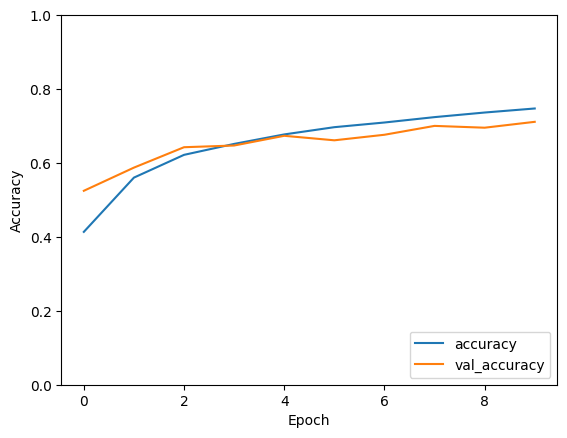

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()